<a href="https://colab.research.google.com/github/Pradeepjha88/Cardiac_attack_prediction/blob/master/Copy_of_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_76hd.csv")
df.head()

,V1,V3,V4,V9,V10,V11,V12,V14,V15,V16,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V37,V38,V39,V40,V41,V43,V44,V51,V55,V56,V57,V58
0,0.000000,0.708333,1.0,0.000000,0.723618,0.003953,0.244292,0.505051,0.370370,1.0,1.0,0.181818,0.045455,0.024691,0.964286,0.0,0.0,0.0,0.0,0.0,0.0,0.659091,0.400000,0.058140,0.603053,0.133333,0.716216,0.615385,0.772727,0.0,0.0,0.370968,1.0,0.637037,0.000000,0.75,0.035714,0.185185,0.964286,0.0
1,0.003367,0.791667,1.0,0.023256,0.798995,0.003953,0.365297,0.404040,0.740741,0.0,1.0,0.181818,0.090909,0.049383,0.964286,0.0,1.0,0.0,0.0,0.0,0.0,0.583333,0.400000,0.058140,0.282443,0.160000,0.513514,0.615385,0.818182,1.0,0.0,0.241935,0.5,0.685185,1.000000,0.00,0.035714,0.049383,0.964286,1.0
2,0.006734,0.791667,1.0,0.023256,0.597990,0.003953,0.235160,0.202020,0.648148,0.0,1.0,0.181818,0.045455,0.222222,0.964286,0.0,1.0,0.0,0.0,0.0,0.0,0.507576,0.400000,0.040698,0.442748,0.253333,0.378378,0.519231,0.727273,1.0,0.0,0.419355,0.5,0.555556,0.666667,1.00,0.035714,0.234568,0.964286,1.0
3,0.010101,0.166667,1.0,0.015504,0.648241,0.000000,0.283105,0.000000,0.000000,0.0,1.0,0.000000,0.045455,0.148148,0.964286,0.0,1.0,0.0,0.0,0.0,0.0,0.848485,0.866667,0.081395,0.885496,0.293333,0.750000,0.403846,0.709091,0.0,0.0,0.564516,1.0,0.618519,0.000000,0.00,0.035714,0.037037,0.964286,0.0
4,0.016835,0.250000,0.0,0.007752,0.648241,0.003953,0.178082,0.000000,0.000000,0.0,1.0,0.181818,0.045455,0.074074,0.964286,0.0,0.0,0.0,0.0,0.0,0.0,0.393939,0.000000,0.034884,0.770992,0.206667,0.513514,0.461538,0.781818,0.0,0.0,0.225806,0.0,0.148148,0.000000,0.00,0.035714,0.209877,0.964286,0.0


In [ ]:
# Find the correlation between every pair of columns
# Correlation: 
# +1 to -1
# +1 highest positive correlation
# -1 highest negative correlation
# 0 there is no correlation or two variables are independent of each other
df.corr().head() 

,V1,V3,V4,V9,V10,V11,V12,V14,V15,V16,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V37,V38,V39,V40,V41,V43,V44,V51,V55,V56,V57,V58
V1,1.000000,-0.008107,-0.091995,-0.078076,0.014990,-0.080611,-0.017334,-0.165844,-0.123840,-0.041998,0.035855,-0.153098,0.039704,-0.049586,0.182372,-0.004792,-0.073313,0.031607,0.227200,-0.010278,-0.079700,-0.048944,-0.112105,-0.107179,-0.078175,-0.053959,-0.047629,-0.174304,-0.072421,0.007664,-0.030824,-0.169844,-0.064889,-0.014391,0.049432,-0.072629,0.026147,-0.088656,0.197500,-0.020331
V3,-0.008107,1.000000,-0.091125,0.024249,0.208996,0.029618,0.210434,-0.126901,0.043642,0.104400,0.023530,0.130642,-0.105593,-0.056316,-0.007443,0.116750,0.027747,0.119223,0.009818,0.061414,0.015274,-0.420575,0.046291,-0.081706,-0.373203,0.014797,0.086857,0.140505,0.045308,0.082731,0.044944,0.192410,0.154615,0.070107,0.350576,0.090986,-0.085886,-0.026954,-0.022362,0.204405
V4,-0.091995,-0.091125,1.000000,0.008215,-0.050778,0.023165,-0.200173,0.323899,0.224247,0.054396,-0.069923,0.042139,-0.026119,0.050682,-0.005919,-0.090437,0.053635,-0.048239,-0.049828,-0.016234,0.003172,0.299711,0.052688,0.054221,-0.044921,-0.200259,0.070908,-0.015825,0.027339,0.184397,0.064933,0.100021,0.040742,0.069551,0.079915,0.377250,-0.020349,0.074306,-0.024989,0.309349
V9,-0.078076,0.024249,0.008215,1.000000,-0.604720,0.986245,-0.083575,0.031397,-0.093732,-0.048552,-0.120393,0.394762,0.202462,0.614717,-0.986774,-0.027611,-0.062567,-0.046010,-0.025086,0.277825,0.996317,-0.060130,0.165376,0.957290,-0.323916,0.519383,-0.335379,0.328292,-0.670927,-0.043241,0.655066,0.068722,-0.085752,-0.258224,-0.055908,-0.067737,0.208776,0.575218,-0.855301,0.144038
V10,0.014990,0.208996,-0.050778,-0.604720,1.000000,-0.590895,0.173419,-0.033284,0.110312,0.138625,0.127396,-0.145529,-0.212148,-0.417836,0.598812,-0.044958,-0.007236,0.038458,-0.037183,-0.182059,-0.603455,-0.119066,-0.091950,-0.616095,0.164194,-0.278701,0.577061,0.093342,0.749812,0.089766,-0.396604,0.122010,0.170457,0.270446,0.105767,0.148721,-0.205701,-0.383840,0.512534,0.039983


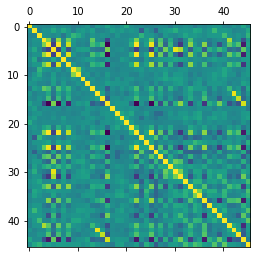

<Figure size 720x432 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.figure(figsize=(10,6))
plt.show()
# df.corr()

In [ ]:
# Print all thos columns which have 
#absolute correlation with target column (V58) > 0.3
corr = df.corr()
corr_target = abs(corr['V58'])
# print(corr_target.sort_values() )
print(df.columns[corr_target > 0.3][:-1])

df.columns[abs(df.corr()['V58']) > 0.3][:-1]

Index(['V4', 'V32', 'V38', 'V40', 'V41', 'V44', 'V51'], dtype='object')


Index(['V4', 'V32', 'V38', 'V40', 'V41', 'V44', 'V51'], dtype='object')

In [ ]:
df.columns

Index(['V1', 'V3', 'V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V50', 'V51',
       'V54', 'V55', 'V56', 'V57', 'V58'],
      dtype='object')

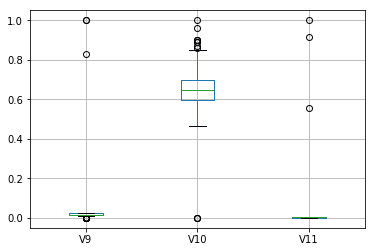

In [ ]:
#Boxplot
# these are used to find the outlier / extreme values in each column
df[['V9','V10','V11']].boxplot()

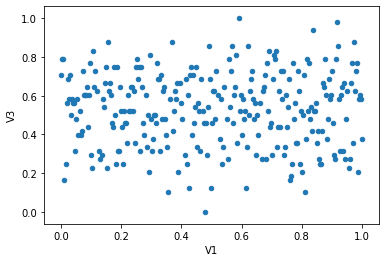

In [ ]:
# Scatter plt
# it is used to find correlation between two variables
df.plot.scatter(x='V1',y='V3')

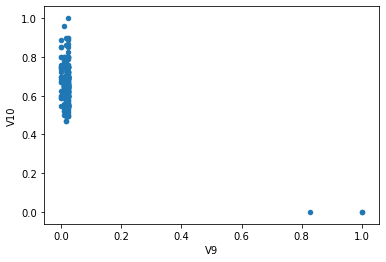

In [ ]:
df.plot.scatter(x='V9',y='V10')

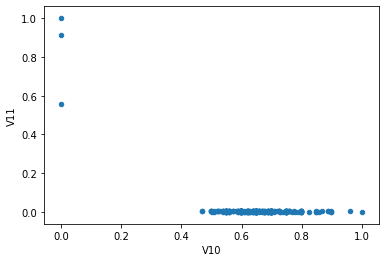

In [ ]:
df.plot.scatter(x='V10',y='V11')

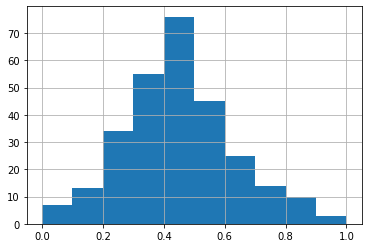

In [ ]:
# Histogram
# TO check the distribution of data
df['V43'].hist()

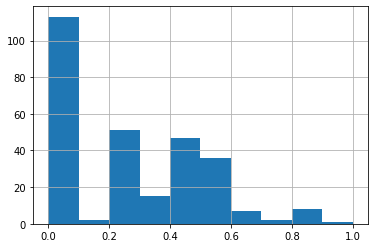

In [ ]:
df['V30'].hist()

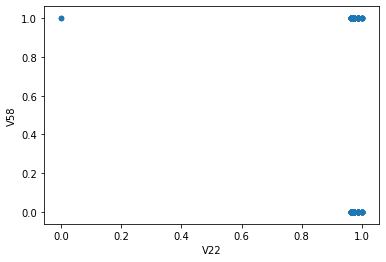

In [ ]:
df.plot.scatter(x='V22',y='V58')

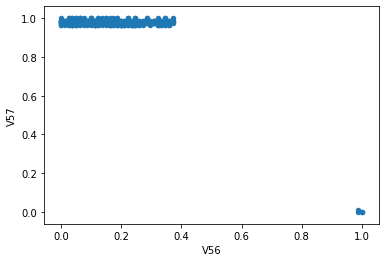

In [ ]:
df.plot.scatter(x='V56',y='V57')

In [ ]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["V58"])
print(cor_target)

V1     0.020331
V3     0.204405
V4     0.309349
V8     0.065434
V9     0.144038
V10    0.039983
V11    0.112136
V12    0.099745
V13    0.090890
V14    0.085525
V15    0.088660
V16    0.001277
V18    0.071976
V19    0.183453
V20    0.052685
V21    0.007952
V22    0.119330
V23    0.165533
V24    0.110801
V25    0.143824
V26    0.064526
V27    0.019151
V28    0.113564
V29    0.247064
V30    0.260546
V31    0.066130
V32    0.410762
V33    0.062453
V34    0.139876
V35    0.089957
V36    0.102718
V37    0.015849
V38    0.406703
V39    0.163591
V40    0.424634
V41    0.320719
V42    0.112146
V43    0.045519
V44    0.450304
V50    0.065434
V51    0.503341
V54    0.097688
V55    0.074246
V56    0.055929
V57    0.136242
V58    1.000000
Name: V58, dtype: float64


In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

V3     0.204405
V4     0.309349
V29    0.247064
V30    0.260546
V32    0.410762
V38    0.406703
V40    0.424634
V41    0.320719
V44    0.450304
V51    0.503341
V58    1.000000
Name: V58, dtype: float64

In [ ]:
# Separate Input features X and Class variable Y
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
from sklearn.decomposition import PCA# Make an instance of the Model
# Principle COmponent Analysis
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
X_train[:5]

(211, 21)


array([[-0.91097359,  0.41429698, -0.39635717,  0.15205053, -0.22201778,
         0.03916557,  0.13171279, -0.10048158, -0.27036022, -0.07539364,
        -0.1984106 ,  0.04350049,  0.19806877, -0.30644461, -0.35637445,
        -0.09330851,  0.08689634,  0.14540468,  0.10981325,  0.15293385,
        -0.05406917],
       [-0.6648444 , -0.61297324,  0.24325392, -0.2569509 ,  0.28162555,
        -0.55755795, -0.29101774,  0.56980522,  0.6522183 ,  0.22501934,
        -0.41280988,  0.3626176 , -0.51766723, -0.1997082 ,  0.00564332,
        -0.46384919, -0.02268064, -0.08692214,  0.0295154 ,  0.05050875,
         0.01171918],
       [ 0.30811971,  0.05479825, -0.49765676, -0.34555092,  0.76809046,
        -0.05585473,  0.62069928,  0.09148509,  0.13694984, -0.11110066,
        -0.06690613, -0.24052988,  0.17415659, -0.14403592,  0.43146299,
         0.23067176,  0.64130381, -0.02985563, -0.20901871, -0.00466421,
         0.09591965],
       [-0.91016315, -0.13592486,  0.11564033,  0.61658445

In [ ]:
pca = PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
X_train[:5]

(211, 21)


array([[-0.91097359,  0.41429698, -0.39635717,  0.15205053, -0.22201778,
         0.03916557,  0.13171279, -0.10048158, -0.27036022, -0.07539364,
        -0.1984106 ,  0.04350049,  0.19806877, -0.30644461, -0.35637445,
        -0.09330851,  0.08689634,  0.14540468,  0.10981325,  0.15293385,
        -0.05406917],
       [-0.6648444 , -0.61297324,  0.24325392, -0.2569509 ,  0.28162555,
        -0.55755795, -0.29101774,  0.56980522,  0.6522183 ,  0.22501934,
        -0.41280988,  0.3626176 , -0.51766723, -0.1997082 ,  0.00564332,
        -0.46384919, -0.02268064, -0.08692214,  0.0295154 ,  0.05050875,
         0.01171918],
       [ 0.30811971,  0.05479825, -0.49765676, -0.34555092,  0.76809046,
        -0.05585473,  0.62069928,  0.09148509,  0.13694984, -0.11110066,
        -0.06690613, -0.24052988,  0.17415659, -0.14403592,  0.43146299,
         0.23067176,  0.64130381, -0.02985563, -0.20901871, -0.00466421,
         0.09591965],
       [-0.91016315, -0.13592486,  0.11564033,  0.61658445

In [ ]:
"""

RFE  reccursive feature elimination

Lasso and Ridge regression
"""

In [ ]:
# Separate Input features X and Class variable Y
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                                    test_size=0.30, random_state=7)

# LASSO (L1)
#"Least Absolute Shrinkage and Selection Operator"

COntrols high value of coefficients

It results in 0 coefficient for those features which are not important

In [ ]:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.        ,  0.        ,  0.11465978,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.01855337,  0.        ,  0.        , -0.        , -0.        ,
       -0.03066738,  0.        ,  0.        , -0.03977729, -0.        ,
        0.        , -0.        ,  0.18881929,  0.        , -0.35334449,
        0.        , -0.        ,  0.        , -0.        ,  0.16354999,
        0.        ,  0.01082045,  0.0437792 , -0.        ,  0.41749142,
        0.23032557,  0.        ,  0.        , -0.0915163 ])

In [ ]:
# Ridge (L2)
# Penalty is Sum of squares of coefficient
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
ridge.fit(X_train,y_train)
ridge.coef_

array([-1.76566554e-05,  4.66893489e-03,  1.42341207e-02,  5.39116272e-04,
        1.80410583e-03,  1.05237600e-04,  1.34633765e-03,  1.08260759e-03,
        8.99309253e-04,  5.10211204e-04,  1.17744635e-03,  7.44967705e-04,
        2.19539394e-03,  1.95941354e-03,  2.33557231e-04, -1.16682447e-03,
       -1.63000647e-03, -3.11052696e-03,  6.44764175e-03,  5.72378340e-03,
       -2.44527484e-03, -7.69879252e-05,  1.54740896e-03, -4.49160069e-03,
        7.01891454e-03,  1.02021123e-03, -7.42037350e-03, -6.04498034e-04,
       -1.95149587e-03,  1.33901327e-03,  1.31317139e-03, -1.03598738e-03,
        1.53544570e-02,  2.20015137e-03,  6.58726724e-03,  8.04340087e-03,
        1.34303201e-03,  1.01357313e-03,  1.29627140e-02, -5.58446252e-04,
        2.05539583e-02,  1.09496555e-03,  6.04872949e-04, -2.73712734e-04,
       -2.17715773e-03])

# RFE

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
rfe = RFE(estimator=model_dt, n_features_to_select=1, step=1)

In [ ]:
y_train.head()

168    1.0
8      1.0
28     0.0
27     0.0
52     1.0
Name: V58, dtype: float64

In [ ]:
rfe.fit(X_train,y_train)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features=None, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=1, step=1, verbose=0)

In [ ]:
rfe.ranking_

array([38, 13,  8,  3,  9, 19,  6, 18, 16, 21, 24, 35, 29, 23, 28, 27, 30,
       32, 34, 39, 37,  2,  4, 12, 15, 20, 22, 11, 10, 25, 14, 17, 26,  1,
        7,  5, 31, 33, 36])

In [ ]:
X.columns

Index(['V1', 'V3', 'V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V50', 'V51',
       'V54', 'V55', 'V56', 'V57'],
      dtype='object')

In [ ]:
for rank, col in zip(rfe.ranking_,X.columns):
    print(rank, col)

6 V1
18 V3
24 V4
23 V8
3 V9
4 V10
19 V11
1 V12
26 V13
28 V14
29 V15
31 V16
30 V18
16 V19
41 V20
13 V21
32 V22
34 V23
35 V24
38 V25
42 V26
44 V27
45 V28
14 V29
11 V30
27 V31
8 V32
10 V33
12 V34
5 V35
17 V36
20 V37
21 V38
25 V39
2 V40
7 V41
22 V42
15 V43
9 V44
33 V50
36 V51
37 V54
39 V55
40 V56
43 V57


# Gini Index Based Feature Selection

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_dt.feature_importances_

array([0.06268554, 0.02275341, 0.        , 0.        , 0.26685315,
       0.02275341, 0.        , 0.04075882, 0.        , 0.01422088,
       0.        , 0.        , 0.        , 0.02528157, 0.        ,
       0.01659103, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03739198, 0.0240066 ,
       0.01264079, 0.06651663, 0.01828399, 0.03996817, 0.03871241,
       0.0404582 , 0.        , 0.        , 0.        , 0.14353428,
       0.04266265, 0.        , 0.00540395, 0.04627068, 0.        ,
       0.        , 0.        , 0.01225184, 0.        , 0.        ])

In [ ]:
m = max(model_dt.feature_importances_)
for imp, col in zip(model_dt.feature_importances_,X.columns):
    print(col, imp/m*100)

V1 13.064502647792917
V3 20.265270017731343
V4 16.88150721885093
V8 0.0
V9 100.0
V10 0.0
V11 0.0
V12 21.322474243566045
V13 0.0
V14 0.0
V15 0.0
V16 0.0
V18 0.0
V19 0.0
V20 0.0
V21 32.2977790989168
V22 0.0
V23 0.0
V24 0.0
V25 6.459555819783358
V26 0.0
V27 0.0
V28 0.0
V29 33.0166392570339
V30 0.0
V31 22.63043500978851
V32 20.456225589396084
V33 0.0
V34 0.0
V35 23.57536311942563
V36 8.741130432242521
V37 0.0
V38 0.0
V39 0.0
V40 57.82903256105818
V41 22.82705043830988
V42 0.0
V43 30.684009211301465
V44 20.882281668846183
V50 0.0
V51 39.0498767430519
V54 0.0
V55 0.0
V56 4.689524210851107
V57 0.0


# Entropy Based Feature Selection

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy')
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_dt.feature_importances_

array([0.0264104 , 0.04096703, 0.03412662, 0.        , 0.20215389,
       0.        , 0.        , 0.04310421, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06529122, 0.        , 0.        , 0.        , 0.01305824,
       0.        , 0.        , 0.        , 0.06674442, 0.        ,
       0.0457483 , 0.04135305, 0.        , 0.        , 0.04765851,
       0.01767053, 0.        , 0.        , 0.        , 0.11690364,
       0.04614577, 0.        , 0.06202892, 0.04221434, 0.        ,
       0.07894084, 0.        , 0.        , 0.00948006, 0.        ])

In [ ]:
m = max(model_dt.feature_importances_)
for imp, col in zip(model_dt.feature_importances_,X.columns):
    print(col, imp/m*100)

V1 13.064502647792917
V3 20.265270017731343
V4 16.88150721885093
V8 0.0
V9 100.0
V10 0.0
V11 0.0
V12 21.322474243566045
V13 0.0
V14 0.0
V15 0.0
V16 0.0
V18 0.0
V19 0.0
V20 0.0
V21 32.2977790989168
V22 0.0
V23 0.0
V24 0.0
V25 6.459555819783358
V26 0.0
V27 0.0
V28 0.0
V29 33.0166392570339
V30 0.0
V31 22.63043500978851
V32 20.456225589396084
V33 0.0
V34 0.0
V35 23.57536311942563
V36 8.741130432242521
V37 0.0
V38 0.0
V39 0.0
V40 57.82903256105818
V41 22.82705043830988
V42 0.0
V43 30.684009211301465
V44 20.882281668846183
V50 0.0
V51 39.0498767430519
V54 0.0
V55 0.0
V56 4.689524210851107
V57 0.0
